In [2]:
import os

# If you are using the FABRIC JupyterHub, the following three evnrionment vars
# were automatically provided when you logged in.
#os.environ['FABRIC_CREDMGR_HOST']='cm.fabric-testbed.net'
#os.environ['FABRIC_ORCHESTRATOR_HOST']='orchestrator.fabric-testbed.net'
#os.environ['FABRIC_TOKEN_LOCATION']=os.environ['HOME']+'/work/fabric_token.json'

# Set your FABRIC PROJECT ID
os.environ['FABRIC_PROJECT_ID']='' #Project ID

# Bastion IPs
os.environ['FABRIC_BASTION_HOST'] = 'bastion-1.fabric-testbed.net'

# Set your Bastion username and private key
os.environ['FABRIC_BASTION_USERNAME']=''
os.environ['FABRIC_BASTION_KEY_LOCATION']=os.environ['HOME']+''

# Set the keypair FABRIC will install in your slice. 
os.environ['FABRIC_SLICE_PRIVATE_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa'
os.environ['FABRIC_SLICE_PUBLIC_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa.pub'

# If your slice private key uses a passphrase, set the passphrase
#from getpass import getpass
#print('Please input private key passphrase. Press enter for no passphrase.')
#os.environ['FABRIC_SLICE_PRIVATE_KEY_PASSPHRASE']=getpass()

In [2]:
import json
import traceback

from fabrictestbed_extensions.fablib.fablib import fablib

In [3]:
SLICE_NAME = 'nginx-lb-slice'
SITE="UCSD"
NUM_SERVERS = 3

# We will use Ubuntu 20.04 for both nodes
IMAGE = 'default_ubuntu_20'
CORES = 1
RAM = 2
server_names = ["server_{}".format(i) for i in range(NUM_SERVERS)]
print(server_names)

['server_0', 'server_1', 'server_2']


# Download data files from the client

In [5]:
try:
    slice = fablib.get_slice(name=SLICE_NAME)
    for node in slice.get_nodes():
        print(f"{node}")
except Exception as e:
    print(f"Exception: {e}")

-----------------  ---------------------------------------------------------------------------------------------------------------------------
ID                 b98de84a-e110-4863-9138-b2ec49af87ab
Name               ngnix_lb
Cores              1
RAM                2
Disk               10
Image              default_ubuntu_20
Image Type         qcow2
Host               ucsd-w2.fabric-testbed.net
Site               UCSD
Management IP      132.249.252.173
Reservation State  Active
Error Message
SSH Command        ssh -i /home/fabric/work/fabric_config/slice_key -J cvankaya_0000027070@bastion-1.fabric-testbed.net ubuntu@132.249.252.173
-----------------  ---------------------------------------------------------------------------------------------------------------------------
-----------------  ---------------------------------------------------------------------------------------------------------------------------
ID                 17255a86-dcbf-48b6-bea7-d4be7b57285b
Name             

In [11]:
slice.get_node("client").download_file("/home/fabric/work/project/data_random.json", "/home/ubuntu/data_random.json")

In [21]:
import json

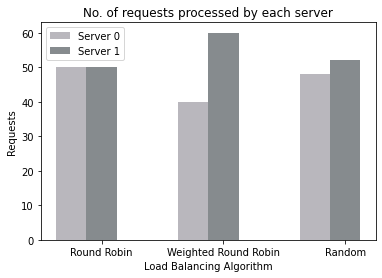

In [2]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [50, 40, 48]
bar1 = plt.bar(ind, xvals, width, color = '#B9B7BD')
  
yvals = [50, 60, 52]
bar2 = plt.bar(ind+width, yvals, width, color='#868B8E')
  
plt.xlabel("Load Balancing Algorithm")
plt.ylabel('Requests')
plt.title("No. of requests processed by each server")
  
plt.xticks(ind+width,['Round Robin', 'Weighted Round Robin', 'Random'])
plt.legend( (bar1, bar2), ('Server 0', 'Server 1') )
plt.savefig('requests.png')
plt.show()

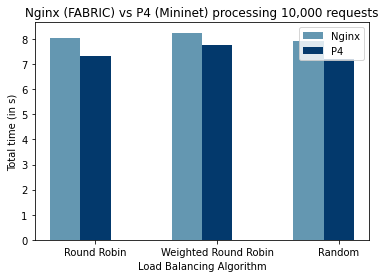

In [26]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [8.042, 8.253, 7.912]

bar1 = plt.bar(ind, xvals, width, color = '#6497b1')
  
#6497b1
yvals = [7.342, 7.764, 7.205]
bar2 = plt.bar(ind+width, yvals, width, color='#03396c')
  
plt.xlabel("Load Balancing Algorithm")
plt.ylabel('Total time (in s)')
plt.title("Nginx (FABRIC) vs P4 (Mininet) processing 10,000 requests")
  
plt.xticks(ind+width,['Round Robin', 'Weighted Round Robin', 'Random'])
plt.legend( (bar1, bar2), ('Nginx', 'P4') )
plt.savefig('requests.png')
plt.show()

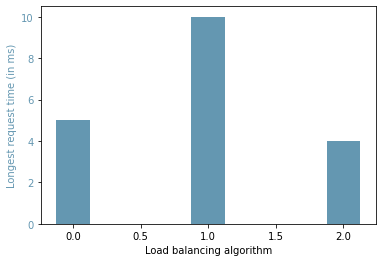

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Creating dataset
x = ["Round Robin", "Weighted Round Robin", "Random"]
dataset_1 = [8.042, 8.253, 7.912]
dataset_2 = [5 , 10, 4]

# Creating plot with dataset_1
fig, ax1 = plt.subplots()

color = '#6497b1'

ax1.set_xlabel('Load balancing algorithm')
ax1.set_ylabel('Longest request time (in ms)', color = color)
bar1 = plt.bar(ind, dataset_2, width, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

In [ ]:
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()

color = '#03396c'
ax2.set_ylabel('Total time (in sec)', color = color)
ax2.plot(x, dataset_1, color = color)
ax2.tick_params(axis ='y', labelcolor = color)

# Adding title
plt.title('Performance of the Nginx load balancer serving 10,000 requests', fontweight ="bold")

# Show plot
plt.show()
